In [1]:
import numpy as np
import matplotlib.pyplot as plt
import UPAFuzzySystems as UPAfs

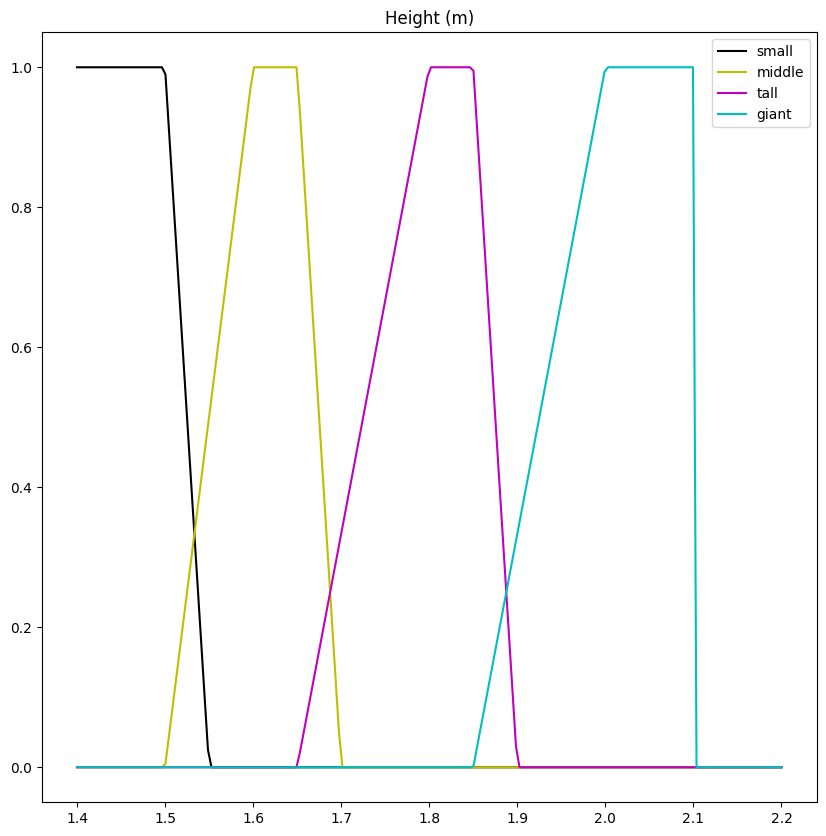

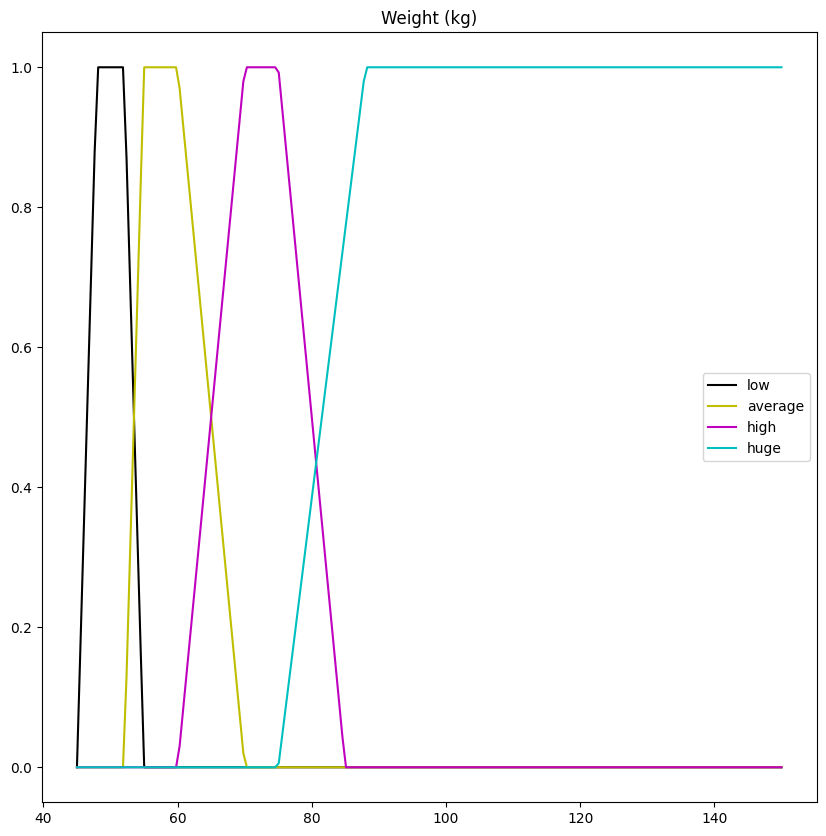

In [2]:
Height = UPAfs.fuzzy_universe('Height (m)',np.linspace(1.4,2.2,200))
Height.add_fuzzyset('small','trapmf',[1.4,1.4,1.5,1.55])
Height.add_fuzzyset('middle','trapmf',[1.5,1.6,1.65,1.7])
Height.add_fuzzyset('tall','trapmf',[1.65,1.8,1.85,1.9])
Height.add_fuzzyset('giant','trapmf',[1.85,2.0,2.1,2.1])
Height.view_fuzzy()

Weight = UPAfs.fuzzy_universe('Weight (kg)',np.linspace(45,150,200))
Weight.add_fuzzyset('low','trapmf',[45,48,52,55])
Weight.add_fuzzyset('average','trapmf',[52,55,60,70])
Weight.add_fuzzyset('high','trapmf',[60,70,75,85])
Weight.add_fuzzyset('huge','trapmf',[75,88,150,150])
Weight.view_fuzzy()



In [3]:
IdealWeight = UPAfs.inference_system('Ideal Weight')
IdealWeight.add_premise(Height)
IdealWeight.add_consequence(Weight)
IdealWeight.add_rule([['Height (m)','small']],[],[['Weight (kg)','low']])
IdealWeight.add_rule([['Height (m)','middle']],[],[['Weight (kg)','average']])
IdealWeight.add_rule([['Height (m)','tall']],[],[['Weight (kg)','high']])
IdealWeight.add_rule([['Height (m)','giant']],[],[['Weight (kg)','huge']])
IdealWeight.configure('Mamdani')
IdealWeight.build()


In [4]:
IdealWeight.premises[0].structure['small'][1][2]=1.5

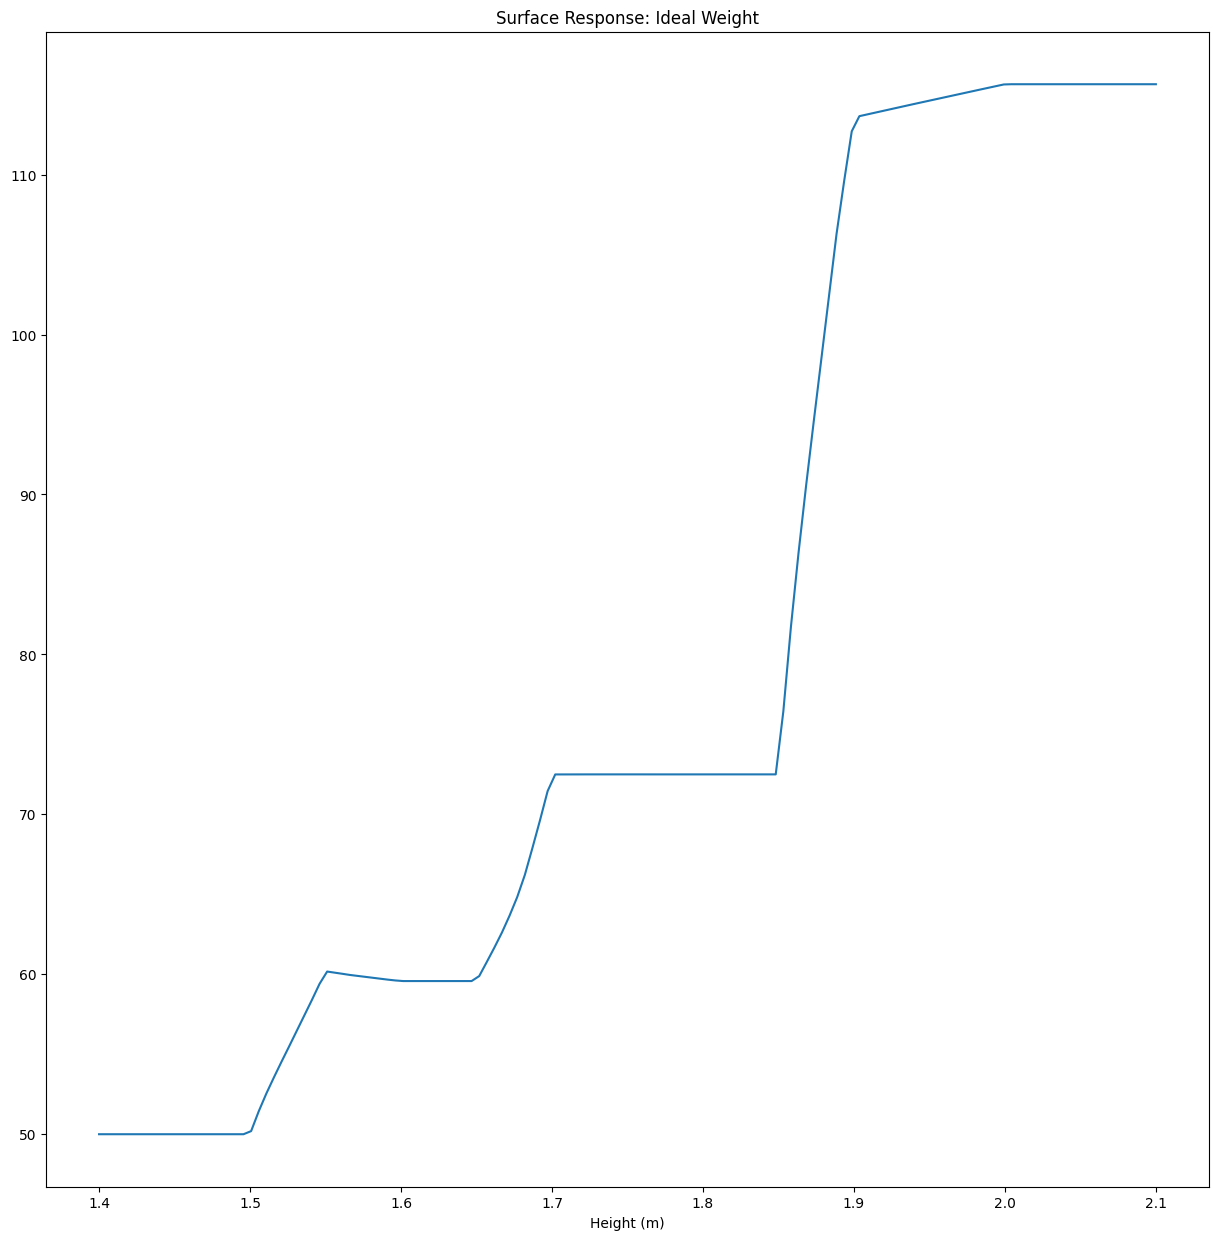

In [5]:
heights = np.linspace(1.4,2.1,140)
IdealWeight.surface_fuzzy_system([heights])

In [6]:
IdealWeight.fuzzy_system_sim([1.4])

array([[50.00171087]])

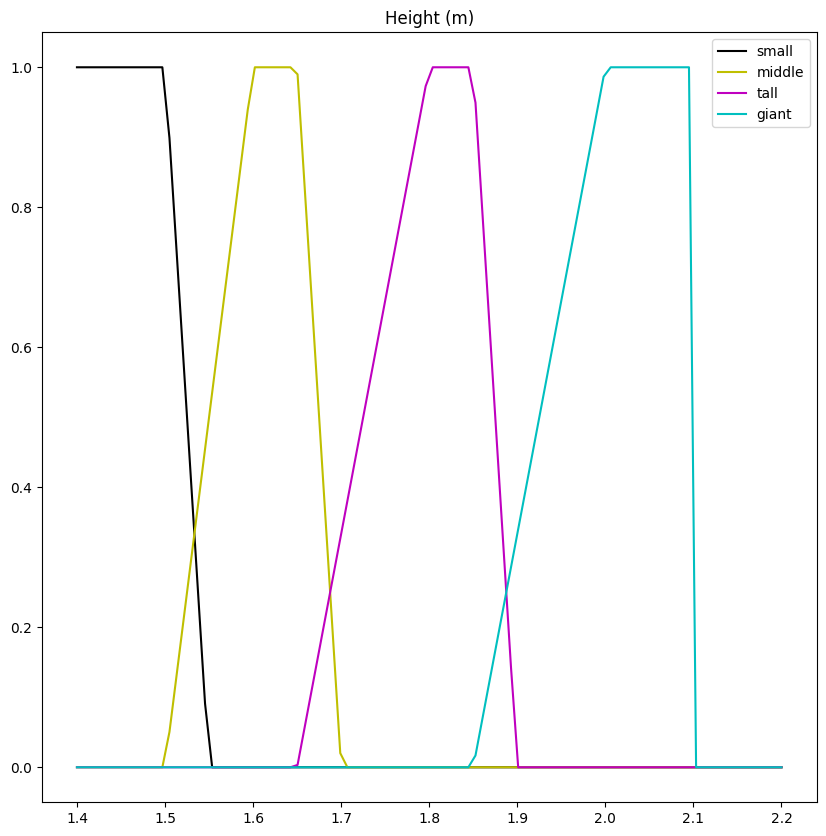

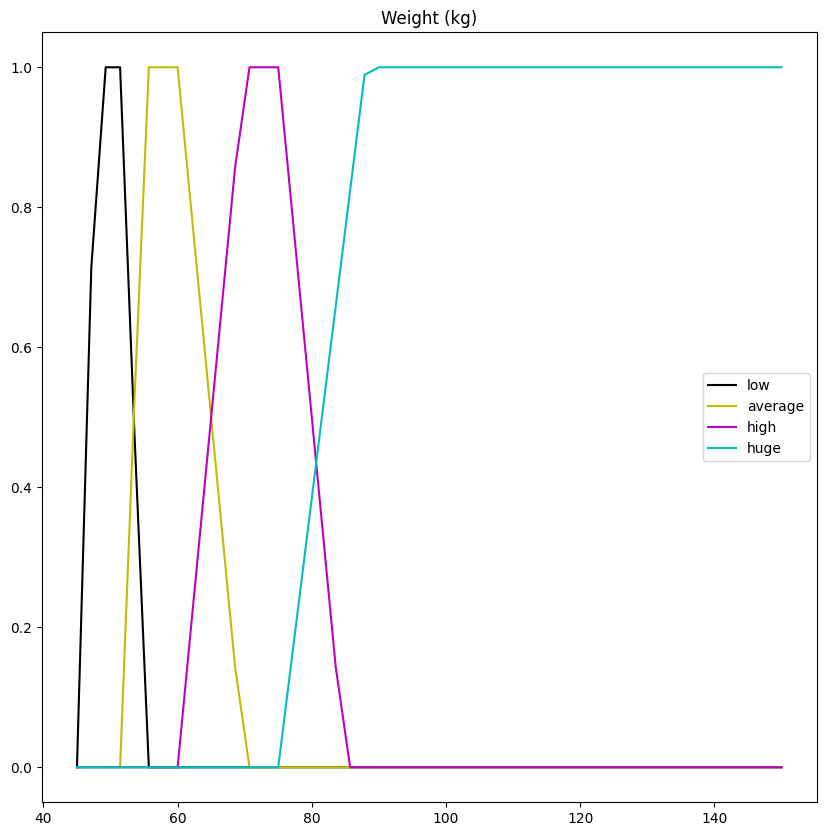

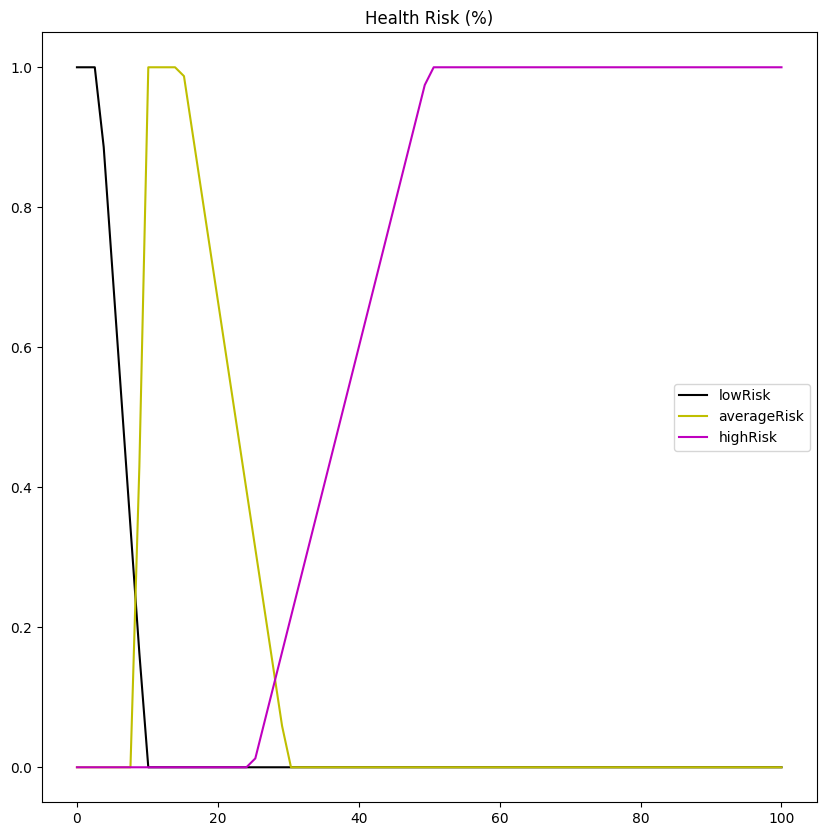

In [7]:
%matplotlib inline

Height = UPAfs.fuzzy_universe('Height (m)',np.linspace(1.4,2.2,100))
Height.add_fuzzyset('small','trapmf',[1.4,1.4,1.5,1.55])
Height.add_fuzzyset('middle','trapmf',[1.5,1.6,1.65,1.7])
Height.add_fuzzyset('tall','trapmf',[1.65,1.8,1.85,1.9])
Height.add_fuzzyset('giant','trapmf',[1.85,2.0,2.1,2.1])
Height.view_fuzzy()

Weight = UPAfs.fuzzy_universe('Weight (kg)',np.linspace(45,150,50))
Weight.add_fuzzyset('low','trapmf',[45,48,52,55])
Weight.add_fuzzyset('average','trapmf',[52,55,60,70])
Weight.add_fuzzyset('high','trapmf',[60,70,75,85])
Weight.add_fuzzyset('huge','trapmf',[75,88,150,150])
Weight.view_fuzzy()

HealthRisk = UPAfs.fuzzy_universe('Health Risk (%)',np.linspace(0,100,80))
HealthRisk.add_fuzzyset('lowRisk','trapmf',[0,0,3,10])
HealthRisk.add_fuzzyset('averageRisk','trapmf',[8,10,15,30])
HealthRisk.add_fuzzyset('highRisk','trapmf',[25,50,100,100])
HealthRisk.view_fuzzy()
HealthRisk

In [8]:
HealthRisks = UPAfs.inference_system('Health Risk (%)')
HealthRisks.add_premise(Height)
HealthRisks.add_premise(Weight)
HealthRisks.add_consequence(HealthRisk)

HealthRisks.add_rule([['Height (m)','small'],['Weight (kg)','low']],['and'],[['Health Risk (%)','lowRisk']])
HealthRisks.add_rule([['Height (m)','small'],['Weight (kg)','average']],['and'],[['Health Risk (%)','averageRisk']])
HealthRisks.add_rule([['Height (m)','small'],['Weight (kg)','high']],['and'],[['Health Risk (%)','highRisk']])
HealthRisks.add_rule([['Height (m)','small'],['Weight (kg)','huge']],['and'],[['Health Risk (%)','highRisk']])

HealthRisks.add_rule([['Height (m)','middle'],['Weight (kg)','low']],['and'],[['Health Risk (%)','averageRisk']])
HealthRisks.add_rule([['Height (m)','middle'],['Weight (kg)','average']],['and'],[['Health Risk (%)','lowRisk']])
HealthRisks.add_rule([['Height (m)','middle'],['Weight (kg)','high']],['and'],[['Health Risk (%)','averageRisk']])
HealthRisks.add_rule([['Height (m)','middle'],['Weight (kg)','huge']],['and'],[['Health Risk (%)','highRisk']])

HealthRisks.add_rule([['Height (m)','tall'],['Weight (kg)','low']],['and'],[['Health Risk (%)','highRisk']])
HealthRisks.add_rule([['Height (m)','tall'],['Weight (kg)','average']],['and'],[['Health Risk (%)','averageRisk']])
HealthRisks.add_rule([['Height (m)','tall'],['Weight (kg)','high']],['and'],[['Health Risk (%)','lowRisk']])
HealthRisks.add_rule([['Height (m)','tall'],['Weight (kg)','huge']],['and'],[['Health Risk (%)','averageRisk']])

HealthRisks.add_rule([['Height (m)','giant'],['Weight (kg)','low']],['and'],[['Health Risk (%)','highRisk']])
HealthRisks.add_rule([['Height (m)','giant'],['Weight (kg)','average']],['and'],[['Health Risk (%)','highRisk']])
HealthRisks.add_rule([['Height (m)','giant'],['Weight (kg)','high']],['and'],[['Health Risk (%)','averageRisk']])
HealthRisks.add_rule([['Height (m)','giant'],['Weight (kg)','huge']],['and'],[['Health Risk (%)','lowRisk']])

HealthRisks.configure('Mamdani')
HealthRisks.build()


(50, 50)
(50, 50)
(50, 50)


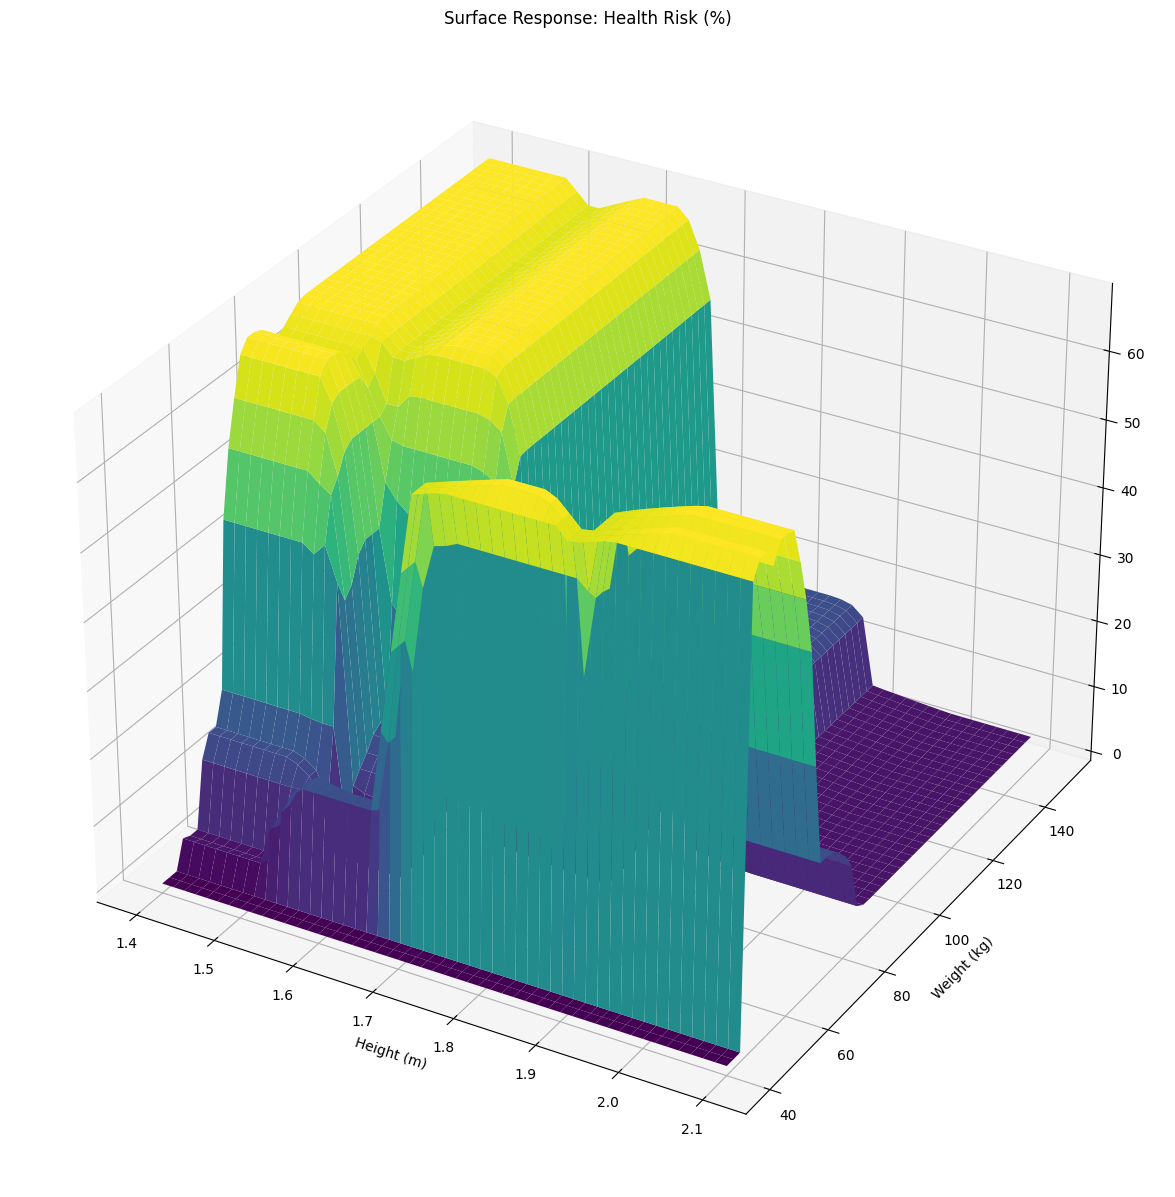

In [9]:
heights = np.linspace(1.4,2.1,50)
weights = np.linspace(40,150,50)

HealthRisks.surface_fuzzy_system([heights,weights])

In [10]:
HealthRisks.fuzzy_system_sim([1.45,60])

array([[16.40881388]])